# Projet IA

In [1]:
import scipy
import numpy
import sklearn
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sergiopeignier as sp

## Attribute selection

In [2]:
parse_df = pds.read_csv("./datas/Data-IA-World-Development-Indicator.txt", sep="\t", header=0)

In [3]:
parse_df.shape

(220, 29)

In [4]:
parse_df.head()

,Time,Time Code,Country Name,Country Code,Diabetes prevalence (% of population ages 20 to 79) [SH.STA.DIAB.ZS],"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]","Incidence of HIV, all (per 1,000 uninfected population) [SH.HIV.INCD.TL.P3]","Incidence of malaria (per 1,000 population at risk) [SH.MLR.INCD.P3]","Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]",...,"People using safely managed drinking water services, urban (% of urban population) [SH.H2O.SMDW.UR.ZS]",People using safely managed drinking water services (% of population) [SH.H2O.SMDW.ZS],"Physicians (per 1,000 people) [SH.MED.PHYS.ZS]",Population ages 0-14 (% of total population) [SP.POP.0014.TO.ZS],Population ages 15-64 (% of total population) [SP.POP.1564.TO.ZS],"Population ages 65 and above, total [SP.POP.65UP.TO]",Poverty gap at $1.90 a day (2011 PPP) (%) [SI.POV.GAPS],Poverty gap at $3.20 a day (2011 PPP) (%) [SI.POV.LMIC.GP],Poverty gap at $5.50 a day (2011 PPP) (%) [SI.POV.UMIC.GP],Pregnant women receiving prenatal care (%) [SH.STA.ANVC.ZS]
0,2014.0,YR2014,Afghanistan,AFG,NaN,5.163,0.5,0.03,12.666374,189.0,...,NaN,NaN,0.2983,45.640589,51.907836,818110.0,NaN,NaN,NaN,63.2
1,2014.0,YR2014,Albania,ALB,NaN,1.688,NaN,0.04,NaN,16.0,...,NaN,69.903702,NaN,19.220282,68.599025,351913.0,0.2,2.5,11.7,NaN
2,2014.0,YR2014,Algeria,DZA,NaN,3.022,NaN,0.04,0.000000,72.0,...,NaN,NaN,NaN,28.264282,66.002598,2231542.0,NaN,NaN,NaN,NaN
3,2014.0,YR2014,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,6.4,...,NaN,12.545842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014.0,YR2014,Andorra,AND,NaN,NaN,NaN,NaN,NaN,8.7,...,NaN,90.639998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Pourcentage de cellules NaN dans 1 colonne
na_col = parse_df.isna().sum()
tmp=parse_df
for i in range(len(na_col)):
    if na_col[i] >= 140:
        parse_df = parse_df.drop(columns = tmp.columns[i])


In [18]:
parse_df

,Time,Time Code,Country Name,Country Code,"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Mortality rate, adult, female (per 1,000 female adults) [SP.DYN.AMRT.FE]","Mortality rate, adult, male (per 1,000 male adults) [SP.DYN.AMRT.MA]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]",Number of infant deaths [SH.DTH.IMRT],Number of maternal deaths [SH.MMR.DTHS],Number of neonatal deaths [SH.DTH.NMRT],Population ages 0-14 (% of total population) [SP.POP.0014.TO.ZS],Population ages 15-64 (% of total population) [SP.POP.1564.TO.ZS],"Population ages 65 and above, total [SP.POP.65UP.TO]"
0,2014.0,YR2014,Afghanistan,AFG,5.163,189.0,62.966,211.026,252.930,55.2,64829.0,9300.0,49416.0,45.640589,51.907836,818110.0
1,2014.0,YR2014,Albania,ALB,1.688,16.0,77.813,51.850,101.598,8.8,314.0,6.0,210.0,19.220282,68.599025,351913.0
2,2014.0,YR2014,Algeria,DZA,3.022,72.0,75.878,85.768,108.786,21.9,21477.0,1100.0,15574.0,28.264282,66.002598,2231542.0
3,2014.0,YR2014,American Samoa,ASM,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014.0,YR2014,Andorra,AND,NaN,8.7,NaN,NaN,NaN,3.5,2.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2014.0,YR2014,Zambia,ZMB,5.026,406.0,60.831,264.503,354.596,47.5,27869.0,1400.0,14739.0,46.509147,51.426682,317877.0
216,2014.0,YR2014,Zimbabwe,ZWE,3.974,278.0,58.410,359.189,413.960,44.2,20871.0,2300.0,13494.0,42.428853,54.692612,391097.0
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
parse_df.isna().sum()

Time                                                                         3
Time Code                                                                    3
Country Name                                                                 3
Country Code                                                                 3
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                   20
Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]                11
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                    19
Mortality rate, adult, female (per 1,000 female adults) [SP.DYN.AMRT.FE]    28
Mortality rate, adult, male (per 1,000 male adults) [SP.DYN.AMRT.MA]        28
Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]             27
Number of infant deaths [SH.DTH.IMRT]                                       27
Number of maternal deaths [SH.MMR.DTHS]                                     35
Number of neonatal deaths [SH.DTH.NMRT]             

In [22]:
parse_df.corr()

,Time,"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Mortality rate, adult, female (per 1,000 female adults) [SP.DYN.AMRT.FE]","Mortality rate, adult, male (per 1,000 male adults) [SP.DYN.AMRT.MA]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]",Number of infant deaths [SH.DTH.IMRT],Number of maternal deaths [SH.MMR.DTHS],Number of neonatal deaths [SH.DTH.NMRT],Population ages 0-14 (% of total population) [SP.POP.0014.TO.ZS],Population ages 15-64 (% of total population) [SP.POP.1564.TO.ZS],"Population ages 65 and above, total [SP.POP.65UP.TO]"
Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",NaN,1.000000,0.402164,-0.840716,0.787494,0.672329,0.858344,0.212827,0.323275,0.156234,0.946748,-0.876935,-0.149189
"Incidence of tuberculosis (per 100,000 people) [SH.TBS.INCD]",NaN,0.402164,1.000000,-0.645068,0.673065,0.688468,0.568782,0.158501,0.164076,0.137988,0.470147,-0.374953,-0.037224
"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",NaN,-0.840716,-0.645068,1.000000,-0.955452,-0.916236,-0.933425,-0.243223,-0.333997,-0.193124,-0.859556,0.733410,0.110908
"Mortality rate, adult, female (per 1,000 female adults) [SP.DYN.AMRT.FE]",NaN,0.787494,0.673065,-0.955452,1.000000,0.925895,0.903645,0.202542,0.312161,0.151527,0.802128,-0.722344,-0.112056
"Mortality rate, adult, male (per 1,000 male adults) [SP.DYN.AMRT.MA]",NaN,0.672329,0.688468,-0.916236,0.925895,1.000000,0.782479,0.166090,0.255544,0.123178,0.709709,-0.634083,-0.112542
"Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]",NaN,0.858344,0.568782,-0.933425,0.903645,0.782479,1.000000,0.305538,0.380888,0.252729,0.848338,-0.759456,-0.105733
Number of infant deaths [SH.DTH.IMRT],NaN,0.212827,0.158501,-0.243223,0.202542,0.166090,0.305538,1.000000,0.874094,0.982695,0.209364,-0.176384,0.477262
Number of maternal deaths [SH.MMR.DTHS],NaN,0.323275,0.164076,-0.333997,0.312161,0.255544,0.380888,0.874094,1.000000,0.785939,0.289104,-0.274223,0.271014
Number of neonatal deaths [SH.DTH.NMRT],NaN,0.156234,0.137988,-0.193124,0.151527,0.123178,0.252729,0.982695,0.785939,1.000000,0.168835,-0.132265,0.498820


<AxesSubplot:>

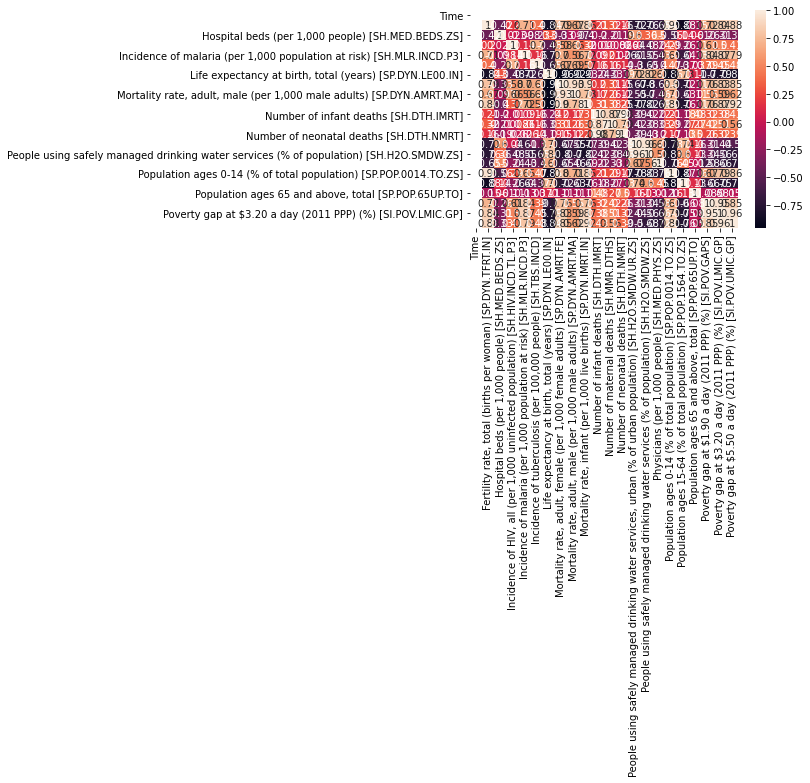

In [23]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
parse_df.drop(columns = ['Time', 'Time code'])


sns.clustermap(df.corr(),annot=True)

In [21]:
print(parse_df.isna().sum(axis=1))

0       0
1       0
2       0
3      11
4       8
       ..
215     0
216     0
217    16
218    16
219    16
Length: 220, dtype: int64


In [ ]:
#Pourcentage de cellules NaN dans 1 ligne
na_row = parse_df.isna().sum(axis=1)
tmp=parse_df
for i in range(len(na_row)):
    if na_row[i] >= 140:
        parse_df = parse_df.drop(index = tmp.columns[i])